# Step 0: Load required libraries

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
import random
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,auc,classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Data Preparation 


In [17]:
data = pd.read_csv('DS_MiniProject_ANON 2.csv')
print(data.shape)
data.head()

(130086, 29)


,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,5/19/14,ST_S0,1,16.175222,78.403833,MS_S0,F,0.0,0.0,1.0,...,2,0,3,0,0,0,0,0,0,0
1,5/17/14,ST_S0,1,15.931554,70.989733,MS_S1,F,0.0,6.0,0.0,...,0,3,3,0,0,0,0,0,0,0
2,5/15/14,ST_S0,1,15.937029,87.578371,MS_S2,M,0.0,0.0,10.0,...,0,0,6,0,0,0,0,0,0,0
3,5/16/14,ST_S1,1,15.934292,68.438056,MS_S2,M,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,5/20/14,ST_S0,1,15.501711,80.514716,MS_S0,F,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [18]:
print(data.shape)
data.info()

(130086, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130086 entries, 0 to 130085
Data columns (total 29 columns):
DATE_FOR                 130086 non-null object
RTD_ST_CD                130086 non-null object
CustomerSegment          130086 non-null object
Tenure                   130086 non-null float64
Age                      130086 non-null float64
MART_STATUS              130086 non-null object
GENDER                   130086 non-null object
CHANNEL1_6M              129277 non-null float64
CHANNEL2_6M              129277 non-null float64
CHANNEL3_6M              129277 non-null float64
CHANNEL4_6M              129277 non-null float64
CHANNEL5_6M              129277 non-null float64
METHOD1_6M               129277 non-null float64
RECENT_PAYMENT           129277 non-null float64
PAYMENTS_6M              129277 non-null float64
CHANNEL1_3M              130086 non-null int64
CHANNEL2_3M              130086 non-null int64
CHANNEL3_3M              130086 non-null int64
CHANN

There are 130086 obsevations in total 

In [19]:
#Change columns to correct column types  
data['RECENT_PAYMENT'] = data['RECENT_PAYMENT'].astype(object)
data['NOT_DI_3M'] = data['NOT_DI_3M'].astype(object)
data['NOT_DI_6M'] = data['NOT_DI_6M'].astype(object)
data['EVENT1_30_FLAG'] = data['EVENT1_30_FLAG'].astype(object)
data["POLICYPURCHASECHANNEL"] = data['EVENT1_30_FLAG'].astype(object)
print(np.sum(data["CustomerSegment"]=="NONE"))
data['CustomerSegment'] = (data['CustomerSegment'].replace('NONE',0)).astype(object)  

3702


There are 3702 "NONE" values in column "CustomerSegement", which might means that the customers deosn't fall into any of those segments. I simply impute them with 0, indicating they are different from the reset of observations.

In [20]:
#Check NAs
print(np.mean(pd.isnull(data)))
print(np.sum(data.loc[data['CHANNEL1_6M'].isnull(),"Call_Flag"])/np.sum(data['Call_Flag']==1))

DATE_FOR                 0.000000
RTD_ST_CD                0.000000
CustomerSegment          0.000000
Tenure                   0.000000
Age                      0.000000
MART_STATUS              0.000000
GENDER                   0.000000
CHANNEL1_6M              0.006219
CHANNEL2_6M              0.006219
CHANNEL3_6M              0.006219
CHANNEL4_6M              0.006219
CHANNEL5_6M              0.006219
METHOD1_6M               0.006219
RECENT_PAYMENT           0.006219
PAYMENTS_6M              0.006219
CHANNEL1_3M              0.000000
CHANNEL2_3M              0.000000
CHANNEL3_3M              0.000000
CHANNEL4_3M              0.000000
CHANNEL5_3M              0.000000
METHOD1_3M               0.000000
PAYMENTS_3M              0.000000
NOT_DI_3M                0.000000
NOT_DI_6M                0.000000
EVENT1_30_FLAG           0.000000
EVENT2_90_SUM            0.000000
LOGINS                   0.000000
POLICYPURCHASECHANNEL    0.000000
Call_Flag                0.000000
dtype: float64

Columns "CHANNEL1_6M", "CHANNEL2_6M", "CHANNEL3_6M", "CHANNEL4_6M","CHANNEL5_6M","METHOD1_6M","RECENT_PAYMENT" and "PAYMENTS_6M" have missing values with propotion less than 1% of the data samples. 

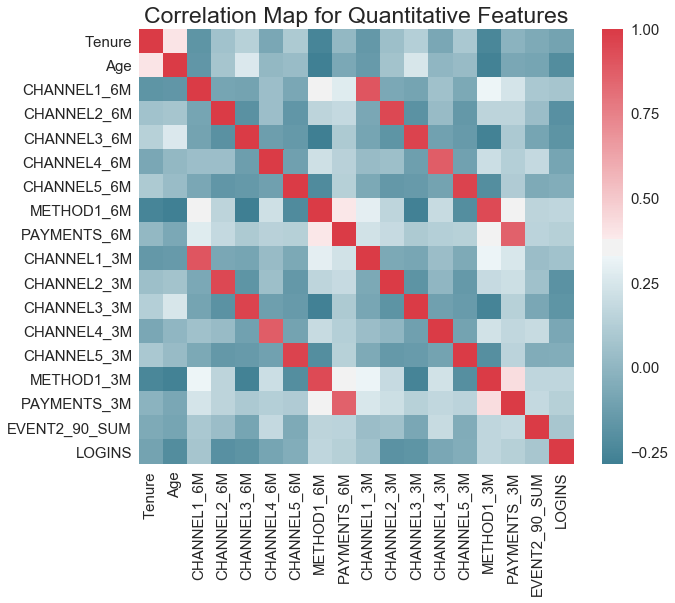

In [21]:
#Check if the quantitative predictors with missing values have association with other predictors
#Correlation heatmap
sns.set(font_scale=1.5)
X= data.iloc[:,:-1]
Y = data.iloc[:,-1]
df = X.loc[X['CHANNEL1_6M'].notnull(),:]
df_q = df[[col for col in df.columns if df[col].dtype in ["float64","int64"]]]
f, ax = plt.subplots(figsize=(10,8))
corr = df_q.corr()
ax = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
ax.set_title('Correlation Map for Quantitative Features',fontsize=23)
plt.show() 

In [ ]:
#Regression plots 
sns.set_style('darkgrid')
fig = plt.figure(figsize=(20,16))
ax1,ax2,ax3,ax4,ax5 = fig.add_subplot(331),fig.add_subplot(332),fig.add_subplot(333),fig.add_subplot(334),fig.add_subplot(335)
ax6,ax7,ax8 = fig.add_subplot(336),fig.add_subplot(337),fig.add_subplot(338)
sns.regplot(df["CHANNEL1_3M"],df["CHANNEL1_6M"],ax=ax1,color="firebrick",)
sns.regplot(df["CHANNEL2_3M"],df["CHANNEL2_6M"],ax=ax2,color="firebrick")
sns.regplot(df["CHANNEL3_3M"],df["CHANNEL3_6M"],ax=ax3,color="firebrick")
sns.regplot(df["CHANNEL4_3M"],df["CHANNEL4_6M"],ax=ax4,color="firebrick")
sns.regplot(df["CHANNEL5_3M"],df["CHANNEL5_6M"],ax=ax5,color="firebrick")
sns.regplot(df["METHOD1_3M"],df["METHOD1_6M"],ax=ax6,color="firebrick")
sns.regplot(df["PAYMENTS_6M"],df["METHOD1_6M"],ax=ax7,color="firebrick")
sns.regplot(df["PAYMENTS_3M"],df["PAYMENTS_6M"],ax=ax8,color="firebrick")
plt.show()

/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The correlation heatmap and the regression plots indicate there are some predictors showing a strong relationship to the quantitative predictors with missing values, such as the pair (CHANNEL1_3M, CHANNEL1_6M), (METHOD1_3M,METHOD1_6M), (PAYMENTS_6M,METHOD1_6M),(PAYMENTS_3M,PAYMENTS_6M) and so on. I'll try RandomForest Regressor and Classifer to impute the missing values by using all the predictors except those predictors with missing values

### Data Imputation 

In [ ]:
#Data Imputation(7 Regressor to impute "CHANNEL1_6M"-"PAYMENTS_6M" and 1 Classifier to impute "Recent Payment") 
#"7 Regressors"
X_notNull = X.loc[X['CHANNEL1_6M'].notnull(),:]
X_Null = X.loc[X['CHANNEL1_6M'].isnull(),:]
y_notselected = Y.loc[X['CHANNEL1_6M'].notnull()]
y_selected = Y.loc[X['CHANNEL1_6M'].isnull()]
col_names = ["CHANNEL1_6M","CHANNEL2_6M","CHANNEL3_6M","CHANNEL4_6M",
             "CHANNEL5_6M","METHOD1_6M","RECENT_PAYMENT","PAYMENTS_6M"]
dummy = ["DATE_FOR","RTD_ST_CD","MART_STATUS","GENDER"]
completed_columns = [i for i in X.columns if i not in col_names]
X_train,y_train = X_notNull[completed_columns],X_notNull[col_names]
X_pred,y_pred = X_Null[completed_columns],X_Null[col_names]
X_train[dummy]=X_train[dummy].apply(LabelEncoder().fit_transform)
X_pred[dummy]=X_pred[dummy].apply(LabelEncoder().fit_transform)
def regressor(col):
    rf = RandomForestRegressor(n_estimators=500,random_state=2019)
    rf.fit(X_train, y_train[col])
    predictions = rf.predict(X_pred)
    y_pred[col] = predictions
cols = pd.Series(["CHANNEL1_6M","CHANNEL2_6M","CHANNEL3_6M","CHANNEL4_6M",
                    "CHANNEL5_6M","METHOD1_6M","PAYMENTS_6M"])
cols.apply(regressor)

In [16]:
#"1 Classifier"
rf2 = RandomForestClassifier(n_estimators=500,random_state=2019)
rf2.fit(X_train,LabelEncoder().fit_transform(y_train['RECENT_PAYMENT']))
y_pred["RECENT_PAYMENT"]= rf2.predict(X_pred)

/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Since the number of payments under different channels are always integers but our predictions are continuous,  I'll simply round the values to the nearest integer.

In [18]:
y_pred = round(y_pred)
y_pred.head()

,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M
365,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0
869,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
1051,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0
1413,0.0,0.0,1.0,0.0,0.0,0.0,0,2.0
1468,0.0,0.0,1.0,0.0,1.0,0.0,0,1.0


In [19]:
logic = y_pred["CHANNEL1_6M"]+y_pred["CHANNEL2_6M"]+y_pred["CHANNEL3_6M"]+y_pred["CHANNEL4_6M"]+y_pred["CHANNEL5_6M"] <= y_pred["PAYMENTS_6M"]
print(np.sum(y_pred["CHANNEL1_6M"]+y_pred["CHANNEL2_6M"]+y_pred["CHANNEL3_6M"]+y_pred["CHANNEL4_6M"]+y_pred["CHANNEL5_6M"] > y_pred["PAYMENTS_6M"]))
X_pred = X_Null.loc[logic, completed_columns]
y_pred = y_pred.loc[logic,:]
y_selected = y_selected.loc[logic]

37


Here, since the number of payments for "CHANNEL1_6M" to "CHANNEL5_6M" must always be less than or equal to the total number of payments in past 6 months "PAYMENTS_6M",but we got 37 examples which beyonds the total number of payments,  I simply remove those 37 examples.  

In [20]:
X_pred_new = pd.concat([X_pred,y_pred],axis=1,ignore_index=False)
X_final = pd.concat([X_notNull,X_pred_new])
Y_final = pd.concat([y_notselected,y_selected])
print(X_final.shape)
print(Y_final.shape)
print(np.sum(np.array(Y_final.index) == np.array(X_final.index)))

(130049, 28)
(130049,)
130049


Our cleaned dataset is of dimension (130049,29), with 28 predictors and 1 class label.

### Predictor encoding 

In [22]:
#LabelEncoder for binary categorical variable; One Hot Encoder for multi-class categorical variables 
X_final_new = X_final.copy()
X_final_new["GENDER"] = (LabelEncoder().fit_transform(X_final_new["GENDER"])).astype(object)
d1 = (pd.get_dummies(X_final_new["DATE_FOR"])).astype(object)
d2 = (pd.get_dummies(X_final_new["RTD_ST_CD"])).astype(object)
d3 = (pd.get_dummies(X_final_new["CustomerSegment"])).astype(object)
d4 = (pd.get_dummies(X_final_new["MART_STATUS"])).astype(object)
X_final_new.drop(["DATE_FOR", "RTD_ST_CD","CustomerSegment","MART_STATUS"],axis=1,inplace=True)

In [23]:
X_final_new = pd.concat([X_final_new,d1,d2,d3,d4],axis=1,ignore_index=False)
print(X_final_new.shape)

(130049, 92)


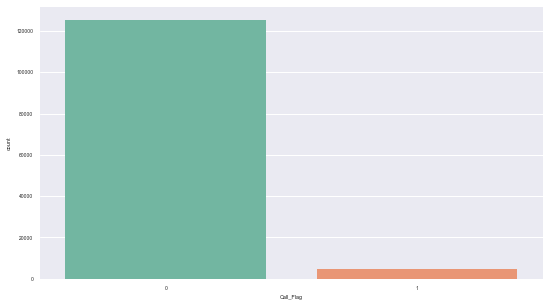

In [80]:
#Check the class distribution 
sns.set_style('darkgrid')
plt.figure(figsize=(9,5))
sns.countplot(Y_final,palette='Set2')
plt.show()

The data is severely imbalaned,with less positive class,  I use up sampling to deal with that problem

In [26]:
#UP sampling 
random.seed(2019)
class0 = X_final_new.loc[Y_final==0,:]
class1 = X_final_new.loc[Y_final==1,:]
n1, n2 = class1.shape[0],class0.shape[0]
index1 = np.random.choice(class1.index,n2,replace=True)
class1_res = class1.loc[index1,:]
X_res = pd.concat([class0,class1_res],ignore_index=False)
Y_res = pd.concat([Y_final[Y_final==0],Y_final[Y_final==1][index1]])
np.mean(Y_res) #The dats is balanced

0.5

### Exploratory Data Analysis 

Question1: How do  the different rated states of plicy affect the payment perference?

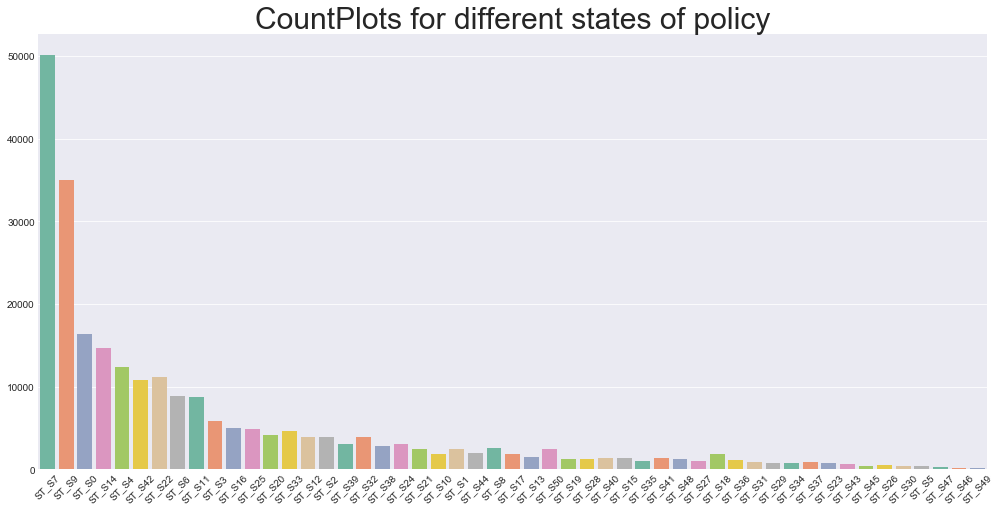

In [27]:
#Countplots 
sns.set_style('darkgrid')
d = np.sum(X_res[X_final["RTD_ST_CD"].unique()])
d = d[X_final['RTD_ST_CD'].value_counts().index]
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
sns.barplot(x=d.index,y=d.values,palette='Set2')
ax.set_xticklabels(X_final['RTD_ST_CD'].value_counts().index,rotation=45)
ax.set_title("CountPlots for different states of policy",fontsize=30)
plt.show()

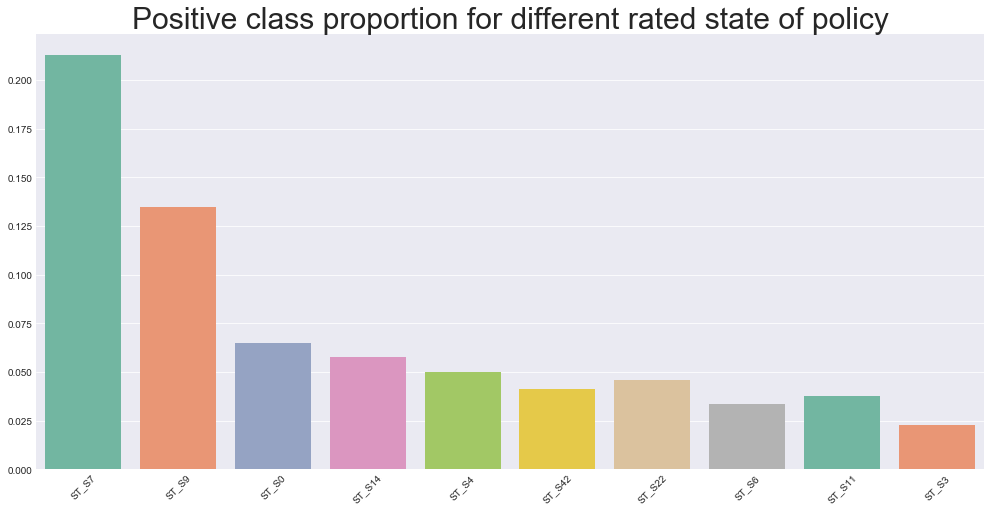

In [28]:
#Positive class proportion for top 10 rated state of policy 
d2 = np.mean(X_res.loc[Y_final==1,X_final["RTD_ST_CD"].unique()])
d2 = d2[X_final['RTD_ST_CD'].value_counts().index]
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
sns.barplot(x=d2.index[:10],y=d2.values[:10],palette='Set2')
ax.set_xticklabels(X_final['RTD_ST_CD'].value_counts().index,rotation=45)
ax.set_title("Positive class proportion for different rated state of policy",fontsize=30)
plt.show()

The two barplots above show that different rated states of policy contribute to different probability of getting a service payment; Customers with  "ST_S7" are most likely to make a service payment call rather than using the online channels or the automated phone system. The rated state of policy is an efficient factor for the classification.   

Question2: Does Gender affect the payment preferrence?

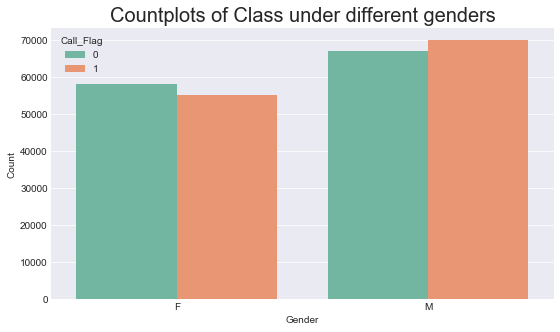

In [29]:
#Countplots of Call_Flag under different gender
df1 = pd.concat([X_res["GENDER"],Y_res],axis=1)
f = df1.loc[df1["GENDER"]==0,"Call_Flag"].value_counts()
f = pd.DataFrame(pd.concat([f,pd.Series([0,1])],axis=1,ignore_index=True))
f['Gender'] = "F"
f.columns = ["Count","Call_Flag","Gender"]
m = df1.loc[df1["GENDER"]==1,"Call_Flag"].value_counts()
m = pd.DataFrame(pd.concat([m,pd.Series([0,1])],axis=1,ignore_index=True))
m['Gender'] = "M"
m.columns = ["Count","Call_Flag","Gender"]
fm = pd.concat([f,m])
plt.figure(figsize=(9,5))
m = sns.barplot(x='Gender', y='Count', hue='Call_Flag', data=fm,palette='Set2')
m.set_title("Countplots of Class under different genders",fontsize=20)
plt.ylabel('Count')
plt.show()

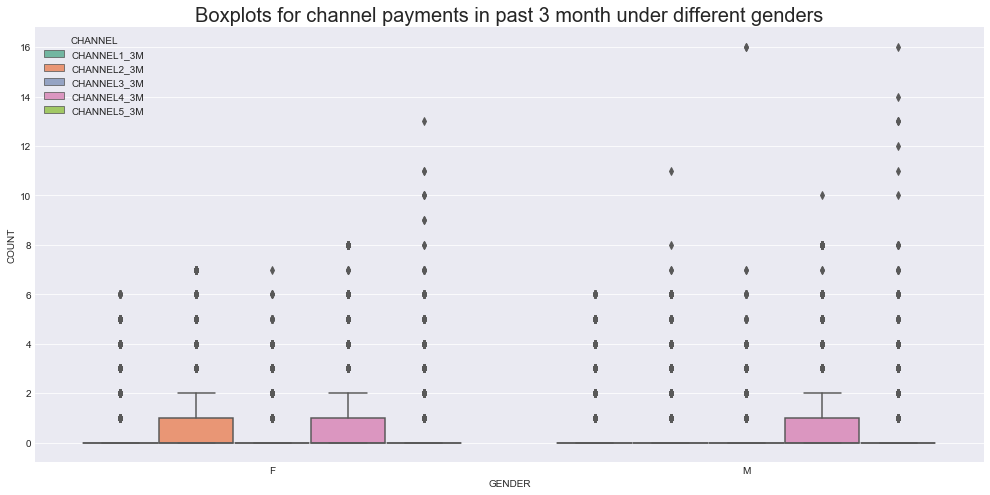

In [30]:
#Countplots for different payment channels in past 3 months under different genders 
d3 = X_res[["GENDER","CHANNEL1_3M","CHANNEL2_3M","CHANNEL3_3M","CHANNEL4_3M","CHANNEL5_3M"]]
d_melt = d3.melt(id_vars="GENDER")
d_melt["GENDER"] = d_melt["GENDER"].replace({0:"F",1:"M"})
d_melt.columns = ["GENDER","CHANNEL","COUNT"]
d_melt = d_melt.loc[d_melt["COUNT"]<20,:]
plt.figure(figsize=(17,8))
s = sns.boxplot(x="GENDER",y="COUNT",hue="CHANNEL",data=d_melt,palette='Set2')
s.set_title("Boxplots for channel payments in past 3 month under different genders",fontsize=20)
plt.show()

Male are a little bit more likely to make service payment call, while female are a little bit more likely to make payments through online channels or the automated phone system; This may be explained by the fact that female enjoy online shopping and paying online gives their similar experience as online shopping. Among the 5 CHANNELS, both Female and Male are more likely and steadily to use CHANNEL4 to do payments. Female also prefers CHANNEL2. Therefore, "GENDER" may have a little effect on the classification results.  We might focus on the Male group when sending out the advertising emails.

Question3: Does the Marriage Status affect the number of call payments?

In [31]:
def create(col_name):
    df1 = pd.concat([X_res[["MS_S0","MS_S1","MS_S2","MS_S3","MS_S4"]],Y_res],axis=1)
    f1 = df1.loc[df1[col_name]==1,"Call_Flag"].value_counts()
    f1 = pd.DataFrame(pd.concat([f1,pd.Series([0,1])],axis=1,ignore_index=True))
    f1['MART_STATUS'] = col_name
    f1.columns = ["Count","Call_Flag","MART_STATUS"]
    return f1 
create("MS_S0")
fm2 =  pd.concat([create("MS_S0"),create("MS_S1"),create("MS_S2"),create("MS_S3"),create("MS_S4")])

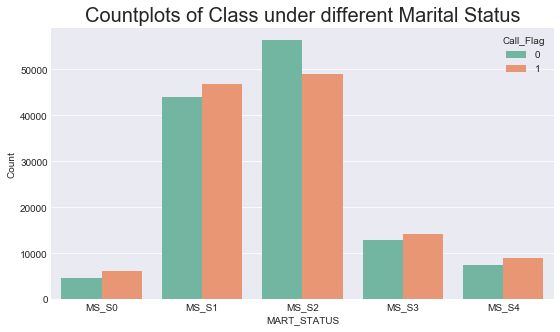

In [32]:
plt.figure(figsize=(9,5))
m = sns.barplot(x='MART_STATUS', y='Count', hue='Call_Flag', data=fm2,palette='Set2')
m.set_title("Countplots of Class under different Marital Status",fontsize=20)
plt.ylabel('Count')
plt.show()

Most of the customers in our datasets are in "MS_S1" and "MS_S2" status,this tells us that our major customer are in "S1" and "S2" martital status; there is an obvious preference for the online payments or auto-call payments in the group of "MS_S2", while there is a little bit preference for the service payment call in other groups("MS_S0","MS_S1","MS_S3" and "MS_S4"). Therefore, we might try to sent more advertising email to the customers at Marital Stage "MS_S0","MS_S1","MS_S3" and "MS_S4" .

Question4: Does age affect the payment preference?

/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


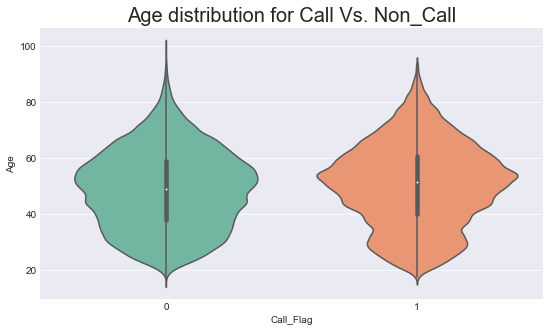

In [33]:
#Violin plot for age distribution under different class 
plt.figure(figsize=(9,5))
m = sns.violinplot(
    x='Call_Flag',
    y='Age',
    data= pd.concat([X_res,Y_res],axis=1,ignore_index=False),
    palette='Set2'
)
m.set_title("Age distribution for Call Vs. Non_Call",fontsize = 20)

plt.show()

There is no big difference batween the propotion of making service call and the porpotion of not making service call for age over 55. However, there is a little difference in the age between 30 and 40, where the service call are less preferred. The "Age" may have a little effect on the classification result.  

Question5: Does Tenure affect the payment preference?

/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


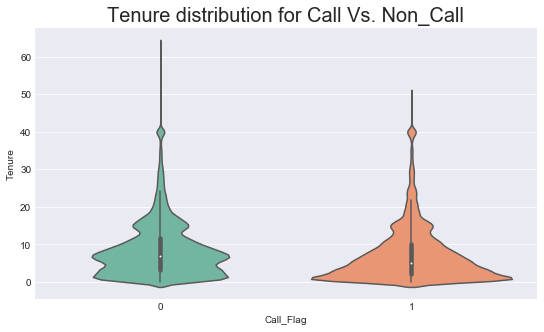

In [34]:
#Violin plot for Tenure distribution under different class 
fig = plt.figure(figsize=(9,5))
m = sns.violinplot(
    x='Call_Flag',
    y='Tenure',
    data= pd.concat([X_res,Y_res],axis=1,ignore_index=False),
    palette='Set2'
)
m.set_title("Tenure distribution for Call Vs. Non_Call",fontsize = 20)
plt.show()

/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


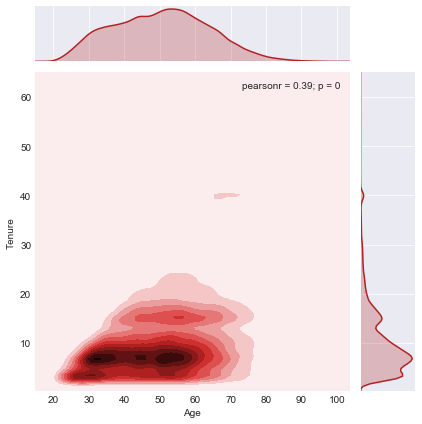

,Age,Tenure
Age,1.000000,0.400068
Tenure,0.400068,1.000000


In [35]:
#Joint plot for Tenure Vs. Age 
plt.figure(figsize=(9,5))
joint = X_res[["Age","Tenure"]].iloc[:100000]
sns.jointplot(x="Age",y="Tenure",data=joint,color='firebrick',kind='kde')
plt.show()
#Correlation 
X_res[["Age","Tenure"]].corr()

(1) According to the violin plot, there is a small preference on online payment or auto-service payment for customers with Tenure more than 15 years; However,for customers with Tenure less than 5 years, the service call is highly preferred; This is resonable, since the customers with Tenure less than 5 years may not be familar with the comapany because of the short tenure. 
(2) There is some relationship between the "Age" and "Tenure" with pearson correlation 0.4.

Question6: Is the higher of  the number of cancellation notice, the higher probability of using service call payment for customer that have received at least one cancellation notice?

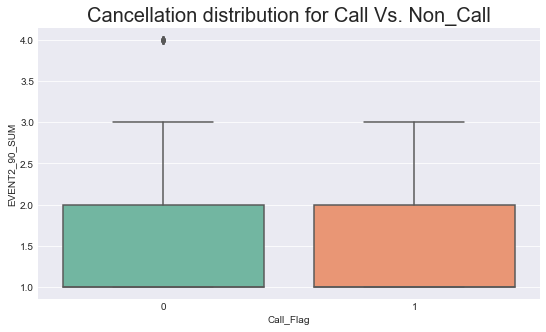

In [36]:
plt.figure(figsize=(9,5))
cancel = X_res["EVENT2_90_SUM"] > 0 
m = sns.boxplot(
    x='Call_Flag',
    y='EVENT2_90_SUM',
    data= pd.concat([X_res.loc[cancel,"EVENT2_90_SUM"],Y_res.loc[cancel]],axis=1,ignore_index=False),
    palette='Set2'
)
m.set_title("Cancellation distribution for Call Vs. Non_Call",fontsize = 20)
plt.show()

There is no big difference in the number of cancellation notice between two class 

There are 250574 customers who log in more than 10 time in last 30 days


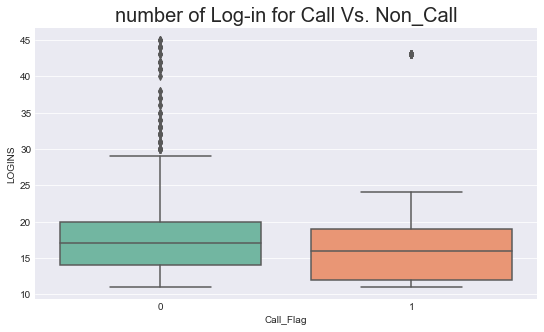

In [37]:
plt.figure(figsize=(9,5))
log = X_res["LOGINS"] > 10
m2 = sns.boxplot(
    x="Call_Flag",
    y='LOGINS',
    data= pd.concat([X_res.loc[log,"LOGINS"],Y_res.loc[log]],axis=1,ignore_index=False),palette='Set2')
m2.set_title("number of Log-in for Call Vs. Non_Call",fontsize = 20)
print("There are %d customers who log in more than 10 time in last 30 days" %len(log) )
plt.show()

There is a slightly higher preference on the online payments for customers who had logged in more than 10 times in the past 30 days, this corresponds to the common sense, as the higher number of online activity  usually represents the higher number of online payments. 

# Step 2: Model fitting

In [126]:
#Train and Test split 
X_train, X_test, y_train, y_test = train_test_split(X_res, Y_res,test_size=0.2,random_state=2019)
print(X_train.shape) #Train dataset has dimension (200459, 92)
print(X_test.shape) #Test dataset has dimension (50115, 92)

(200459, 92)
(50115, 92)


### Base line model-logistic regression

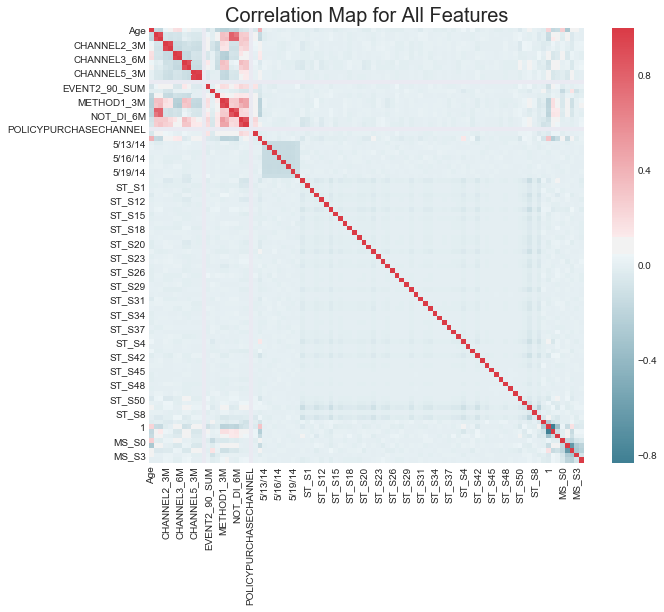

In [40]:
#Check Assumptions
x = X_res.astype("float32")
corr2 = x.corr()
f, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr2, mask=np.zeros_like(corr2, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
ax.set_title('Correlation Map for All Features',fontsize=20)
plt.show() 

The high correlation pairs(either positive or negative) show up at the upper-left corner and bottom right corner, we may take a deeper look at the correlation heatmap only for those variables.

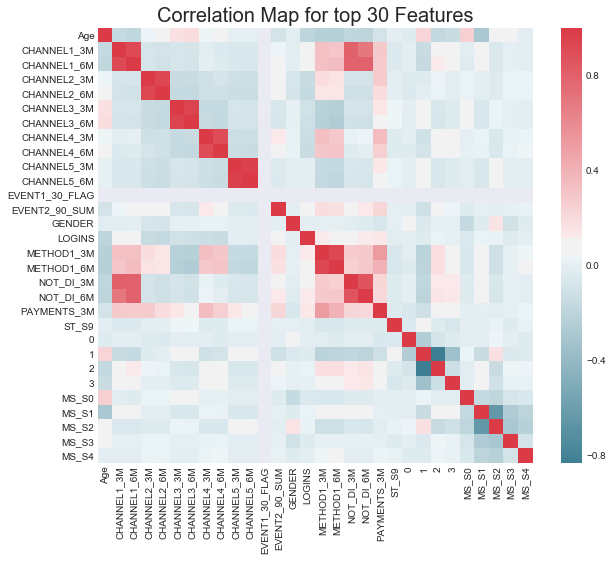

Age               1
CHANNEL1_3M       3
CHANNEL1_6M       2
CHANNEL2_3M       2
CHANNEL2_6M       2
CHANNEL3_3M       2
CHANNEL3_6M       2
CHANNEL4_3M       2
CHANNEL4_6M       2
CHANNEL5_3M       2
CHANNEL5_6M       2
EVENT1_30_FLAG    0
EVENT2_90_SUM     1
GENDER            1
LOGINS            1
METHOD1_3M        2
METHOD1_6M        2
NOT_DI_3M         3
NOT_DI_6M         2
PAYMENTS_3M       1
ST_S9             1
0                 1
1                 1
2                 1
3                 1
MS_S0             1
MS_S1             1
MS_S2             1
MS_S3             1
MS_S4             1
dtype: int64

In [47]:
x_new = pd.concat([x.iloc[:,0:20],x.iloc[:,-10:]],axis=1,ignore_index=False)
corr3 = x_new.corr()
f, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr3, mask=np.zeros_like(corr3, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
ax.set_title('Correlation Map for top 30 Features',fontsize=20)
plt.show() 
np.sum(corr3>0.8)

There are many predictor pairs with high correlation,such as ("CHANNEL1_6M",CHANNEL1_3M"), ("NOT_D1_6M","NOT_D1_3M"),("CustomerSegment 1", "CustomerSegment 2") and so on,  which indicates multi-colinearity existing among both quantitative variables and dummy variables. I use PCA to remove colinearity among quantitative variables and simply remove one of the dummy variables in predictor pairs with high correlation. Specifically, I remove the column "NOT_DI_3M" from the pair ("NOT_DI_3M", "NOT_DI_6M") and do PCA on all quantitative variables.

In [57]:
#Standarlization and PCA dimension reduction
n1 = X_res.shape[0]
pca = PCA(n_components=10)
col_quant = X_res.columns[[i for i in np.arange(X_res.shape[1]) 
                           if X_res.iloc[:,i].dtype in ["int64","float64"]]]
X_sd = StandardScaler().fit_transform(X_res[col_quant])
X_bi = X_res.copy()
X_bi = X_bi.drop(col_quant,axis=1)
X_bi = X_bi.drop(["NOT_DI_3M"],axis=1)
pc = pd.DataFrame(pca.fit_transform(X_sd))
pc.set_index(X_bi.index,inplace=True)
pc.columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"]
X_logit = pd.concat([X_bi,pc],axis=1)
X_train_logit,X_test_logit,y_train_logit,y_test_logit  = train_test_split(X_logit, Y_res,random_state=2019,test_size=0.2)

/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


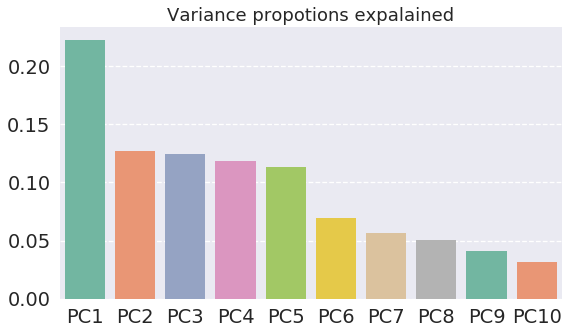

The total variance explained by top 10 PCs are 95.40%


In [58]:
#Variance explained by the principle components 
plt.figure(figsize=(9,5))
variance = pca.explained_variance_ratio_
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
m = sns.barplot(x=pc.columns,y=variance,palette='Set2')
m.set_title("Variance propotions expalained",fontsize=18)
plt.show()
print("The total variance explained by top 10 PCs are "+"{:.2%}".format(var[9]/100))

Finally, "GENDER","NOT_DI_6M","PURCHASECHANNEL","RECENT_PAYMENT","RTD_ST_CD","CustomerSegment","MART_STATUS" and the top 10 principle components are choosed to be input for logistic regression 

In [142]:
#Fit logistic regression
logreg = LogisticRegression(C=1,random_state=2019)
logreg.fit(X_train_logit, y_train_logit)
#Predictions 
predictions = logreg.predict(X_test_logit)
probs = logreg.predict_proba(X_test_logit)

/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [143]:
#Performance for logistic regression 
cm = confusion_matrix(y_test_logit,predictions)
tn, fp, fn, tp = cm.ravel()
print(classification_report(y_test_logit, predictions))
print("The accuracy for logistic regression is: "+"{:.2%}".format(np.mean(predictions==y_test_logit)));
print("The precision for logistic regression is: "+"{:.2%}".format(tp/(tp+fp)))
print("The recall for logistic regression is: "+"{:.2%}".format(tp/(tp+fn)))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76     25065
           1       0.76      0.79      0.78     25050

   micro avg       0.77      0.77      0.77     50115
   macro avg       0.77      0.77      0.77     50115
weighted avg       0.77      0.77      0.77     50115

The accuracy for logistic regression is: 77.00%
The precision for logistic regression is: 75.82%
The recall for logistic regression is: 79.27%


/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


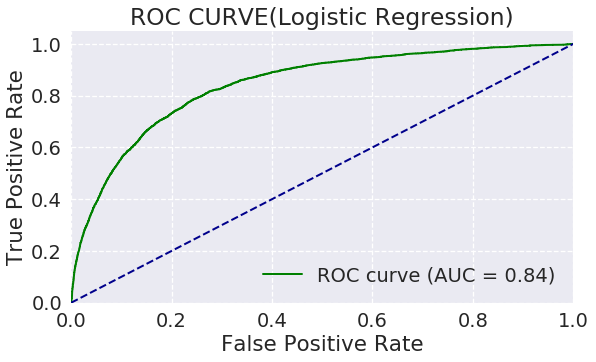

In [144]:
#ROC curve for logistic regression 
sns.set('talk', 'darkgrid', 'dark', font_scale=1.5, font='Ricty',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
fpr, tpr, _ = roc_curve(y_test_logit, probs[:,1])
roc_auc = auc(fpr, tpr)

lw = 2
plt.figure(figsize=(9,5))
plt.plot(fpr, tpr, color='g',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE(Logistic Regression)')
plt.legend(loc="lower right")
plt.show()
plt.savefig('roc_auc.png')
plt.close()

The logistic regression model performs not bad, the recall is about 79% and the area under curve is 0.84. Since it's worth on decreasing more service payment calls at the trade of sending out more pre-emptive email message, which is to say we care more about the "FN"(False Negative) than "FP"(False Positive), 79% recall is good.

### Advanced Model-Random Forest

In [152]:
#Tuning parameters with cross-validation 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [3],
    'min_samples_leaf': [3],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]
}
rf_cv = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf_cv, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  9.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90], 'max_features': [3], 'min_samples_leaf': [3], 'min_samples_split': [8, 10], 'n_estimators': [100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [156]:
print("The best parameter pair for random forest:")
print( grid_search.best_params_)

The best parameter pair for random forest:
{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}


In [159]:
#Random_forest 
rff = RandomForestClassifier(bootstrap=True, max_depth=80,max_features =3,
                             min_samples_leaf=3,min_samples_split=8,
                             n_estimators=200,random_state=2019)
rff.fit(X_train,y_train)
#Predictions 
predictions2 = rff.predict(X_test)
prob2 = rff.predict_proba(X_test)

/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


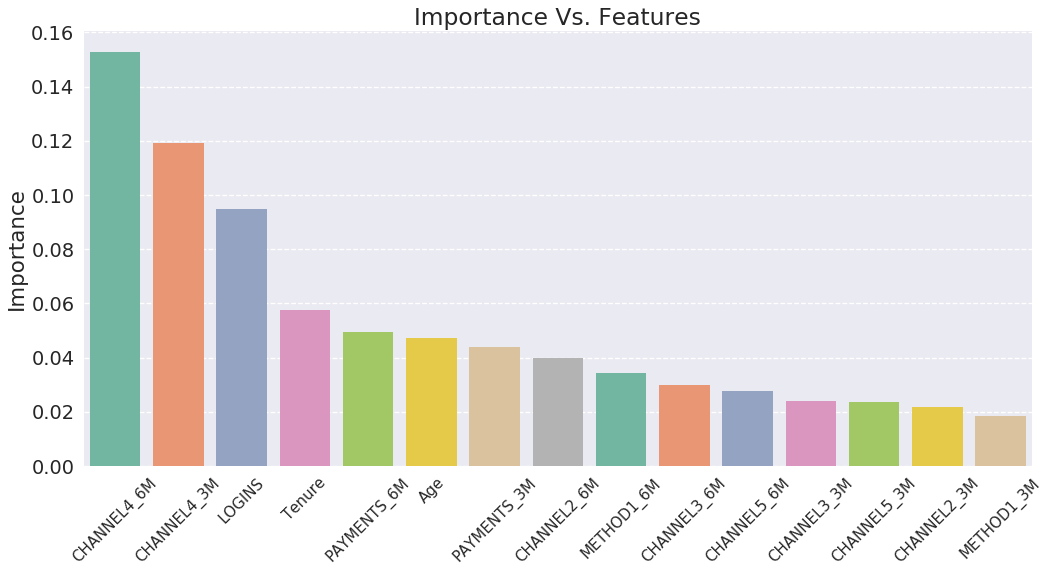

In [162]:
#Feature importance 
importance = rff.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, 
                          columns=["Importance"])
importance["Std"] = np.std([tree.feature_importances_
                            for tree in rff.estimators_], axis=0)

x = range(importance.shape[0])[0:15]
y = importance.ix[:, 0]
y_sorted = y.sort_values(ascending=False)[0:15]
yerr = importance.ix[:, 1][0:15].loc[y_sorted.index]
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
sns.barplot(x=np.array(y_sorted.index), y=y_sorted,palette='Set2')
ax.set_xticklabels(np.array(y_sorted.index),rotation=45,fontsize=15)
ax.set_title("Importance Vs. Features")
plt.show()

The top 15 features ordered by importance are "CHANNEL4_6M", "CHANNEL4_3M","LOGINS","Tenure","PAYMENTS_6M","Age","PAYMENTS_3M","CHANNEL2_6M","METHOD1_6M","CHANNEL3_6M","CHANNEL5_6M","CHANNEL3_3M","CHANNEL5_3M","CHANNEL2_3M" and "METHOD1_3M". It shows that 15 out of 15 are quantitative predictors, no qualitative variables. Some features that show a relatively strong relationship with the classification results in EDA part don't appear among the top features, such as "MART_STATUS" and "RTD_ST_CD".   

In [163]:
#Performance for Random Forest 
cm2 = confusion_matrix(y_test,predictions2)
tn, fp, fn, tp = cm2.ravel()
print(classification_report(y_test, predictions2))
print("The accuracy for random forest is: "+"{:.2%}".format(np.mean(predictions2==y_test)));
print("The precision for random forest is: "+"{:.2%}".format(tp/(tp+fp)))
print("The recall for random forest is: "+"{:.2%}".format(tp/(tp+fn)))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     25065
           1       0.89      0.96      0.92     25050

   micro avg       0.92      0.92      0.92     50115
   macro avg       0.92      0.92      0.92     50115
weighted avg       0.92      0.92      0.92     50115

The accuracy for random forest is: 92.02%
The precision for random forest is: 88.87%
The recall for random forest is: 96.08%


/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


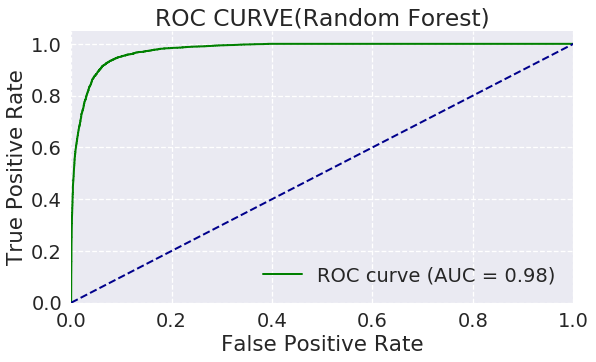

In [164]:
#ROC curve for random forest
sns.set('talk', 'darkgrid', 'dark', font_scale=1.5, font='Ricty',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
fpr, tpr, _ = roc_curve(y_test, prob2[:,1])
roc_auc = auc(fpr, tpr)

lw = 2
plt.figure(figsize=(9,5))
plt.plot(fpr, tpr, color='g',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE(Random Forest)')
plt.legend(loc="lower right")
plt.show()
plt.savefig('roc_auc.png')
plt.close()

# Step 3: Model performances comparison 

In general, Random Forest performs better than logistic regression for this dataset; Firstly, Random Forest have much higher AUC and F1 score than logistic regression; Secondly, there no tedious procedure for data transformation like feature scaling and assumption checking; Lastly, random forest can provide us with important feature subset. 

In [15]:

feat_importances = pd.DataFrame({"name":X_train_logit.columns,"coef":logreg.coef_[0]})
feat_importances = feat_importances[['name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

NameError: name 'X_train_logit' is not defined